In [1]:
#Problem Definition.

In [2]:
#"The Avocado dataset we are classifying Organic & Conventional Type and prediting the Average price using Regression model from year 2015, 2016, 2017 and 2018 data."#"The Avocado dataset we are classifying Organic & Conventional Type and prediting the Average price using Regression model from year 2015, 2016, 2017 and 2018 data."

In [3]:
#Importing important librarires

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
df1 = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')


In [8]:
df2 = pd.read_csv('Avacado file.csv')

In [9]:
df=pd.concat([df1, df2], ignore_index=True)

In [10]:
# Data Inspection

In [11]:
df.shape

(34717, 14)

In [12]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [13]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
34712,7.0,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018.0,WestTexNewMexico
34713,8.0,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018.0,WestTexNewMexico
34714,9.0,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018.0,WestTexNewMexico
34715,10.0,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018.0,WestTexNewMexico
34716,11.0,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018.0,WestTexNewMexico


In [14]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,19766.000000,19766.000000,1.976600e+04,1.976600e+04,1.976600e+04,1.976600e+04,1.976600e+04,1.976600e+04,1.976600e+04,19766.000000,19766.000000
mean,24.444298,1.380576,9.082998e+05,3.201335e+05,3.194286e+05,2.495535e+04,2.437804e+05,1.873045e+05,5.344044e+04,3035.461097,2016.072296
std,15.450555,0.400254,3.543859e+06,1.333107e+06,1.249147e+06,1.103271e+05,9.707177e+05,7.392683e+05,2.367124e+05,17127.068261,0.945991
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.080000,1.238263e+04,1.021060e+03,3.466915e+03,0.000000e+00,5.966125e+03,3.494990e+03,1.469000e+02,0.000000,2015.000000
50%,24.000000,1.330000,1.257663e+05,1.114762e+04,3.442968e+04,2.658350e+02,4.344802e+04,3.014069e+04,2.840850e+03,0.000000,2016.000000
75%,38.000000,1.630000,4.761813e+05,1.223621e+05,1.728365e+05,7.678560e+03,1.145222e+05,8.644612e+04,2.255365e+04,146.377500,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [15]:
# now we have to check null values for the dataset

In [16]:
df.isna().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [17]:
df.apply(lambda x: sum(x.isnull()))

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [19]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [20]:
df.dropna(inplace=True)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34712,7.0,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018.0,WestTexNewMexico
34713,8.0,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018.0,WestTexNewMexico
34714,9.0,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018.0,WestTexNewMexico
34715,10.0,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018.0,WestTexNewMexico


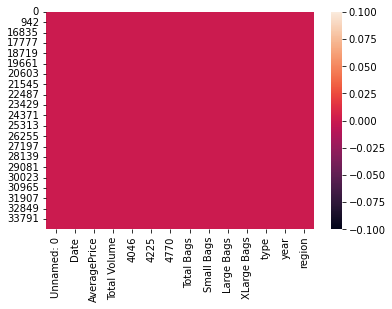

In [21]:
sns.heatmap(df.isnull());

In [22]:
print('total number of duplicate values : ',sum(df.duplicated()))

total number of duplicate values :  1517


In [23]:
# To remove duplicates from the dataset

In [25]:
df.drop_duplicates(subset=None, keep='first', inplace=False)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34712,7.0,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018.0,WestTexNewMexico
34713,8.0,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018.0,WestTexNewMexico
34714,9.0,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018.0,WestTexNewMexico
34715,10.0,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018.0,WestTexNewMexico


In [27]:
df=df.drop(['Unnamed: 0'], axis=1)

In [28]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [29]:
# String Check

In [30]:
df.select_dtypes('object').columns

Index(['Date', 'type', 'region'], dtype='object')

In [31]:
# Outlier Detection

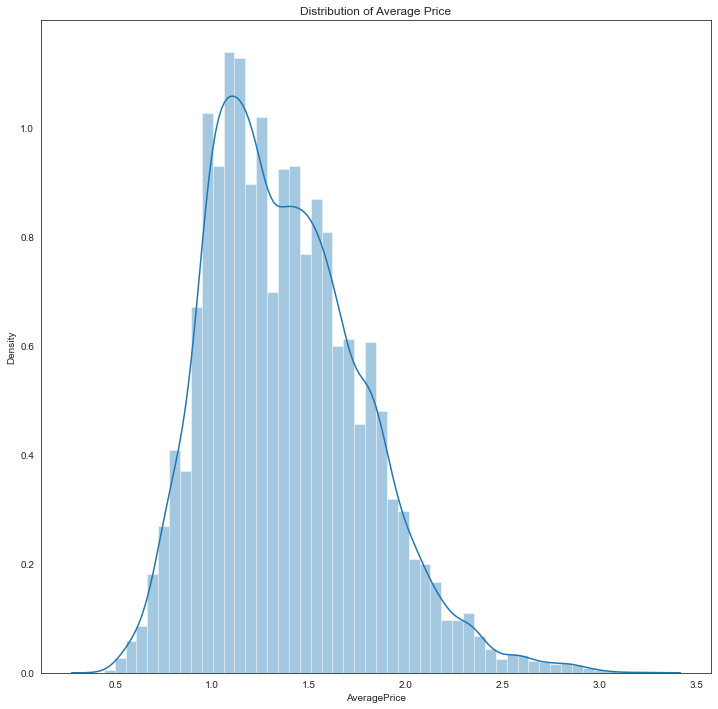

In [32]:
sns.set_style("white")

plt.figure(figsize=(12,12))
sns.distplot(df.AveragePrice)
plt.title("Distribution of Average Price",fontsize=12);

In [33]:
# observation -Looks like positive skewed slightly

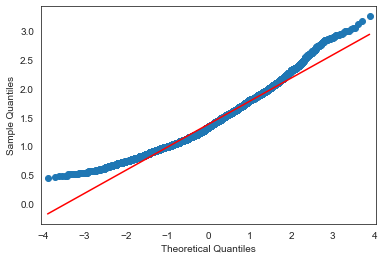

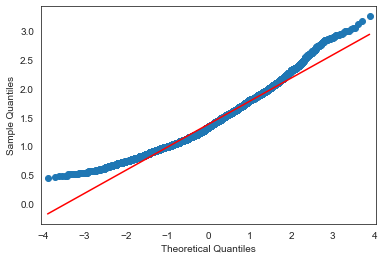

In [34]:
import statsmodels.api as sm
sm.qqplot(df.AveragePrice,line="s")

In [35]:
mean = df.AveragePrice.mean()
std = df.AveragePrice.std()
lower, upper = mean-std*2,mean+std*2 
print("Lower Limit : {} Upper Limit : {}".format(lower,upper))

Lower Limit : 0.5800684029086692 Upper Limit : 2.181083069316373


In [36]:
outliers = [x for x in df.AveragePrice if x < lower or x > upper]
print("Outlier values : {}".format(outliers))

Outlier values : [0.49, 0.53, 0.56, 0.58, 0.56, 0.54, 0.53, 0.52, 0.56, 0.58, 0.53, 0.51, 0.57, 0.57, 0.56, 0.58, 0.49, 0.53, 0.56, 0.58, 0.56, 0.54, 0.53, 0.52, 0.56, 0.58, 0.53, 0.51, 0.57, 0.57, 0.56, 0.58, 0.54, 0.58, 0.58, 0.58, 0.58, 0.56, 0.58, 0.58, 0.55, 0.57, 0.54, 0.56, 0.54, 0.56, 0.51, 0.57, 0.55, 2.2, 0.56, 2.22, 2.19, 0.53, 0.58, 0.55, 0.53, 0.57, 0.51, 0.54, 0.53, 0.57, 0.54, 0.46, 0.58, 0.54, 0.52, 0.56, 0.58, 0.56, 0.58, 2.28, 2.35, 2.29, 2.24, 2.19, 2.19, 2.29, 2.29, 2.24, 2.32, 2.24, 2.34, 2.33, 2.31, 2.23, 2.27, 2.3, 2.41, 2.31, 2.36, 2.37, 2.33, 2.31, 2.39, 2.31, 2.42, 2.39, 2.45, 2.38, 2.4, 2.31, 2.4, 2.25, 2.34, 2.24, 2.36, 2.3, 2.31, 2.24, 2.27, 2.27, 2.26, 2.38, 2.37, 2.21, 2.35, 2.28, 2.32, 2.26, 2.31, 2.19, 2.21, 2.21, 2.22, 2.31, 2.4, 2.34, 2.25, 2.22, 2.24, 2.28, 2.3, 2.2, 2.24, 2.34, 2.31, 2.21, 2.21, 2.24, 2.21, 2.21, 2.58, 2.79, 2.66, 2.59, 2.74, 2.79, 2.73, 2.73, 2.77, 2.71, 2.73, 2.72, 2.76, 2.75, 2.36, 2.2, 2.23, 2.19, 2.25, 2.29, 2.2, 2.28, 2.24, 2.

In [37]:
df_exclude = df[(df.AveragePrice < upper) | (df.AveragePrice > lower)]

In [38]:
df_exclude.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [39]:
df_exclude.shape

(19766, 13)

In [41]:
df.shape

(19766, 13)

In [42]:
# Outlier:



In [44]:
quantile = np.quantile(df.AveragePrice,[0.25,0.5,0.75,1]) # Use numpy quantile
IQR = quantile[2] - quantile[0] # Calculate IQR through third quantile - first quantile
upper = 1.5*IQR + quantile[2]
lower = quantile[0] - 1.5*IQR

print("Upper bound : {} Lower bound : {}".format(upper,lower))

outlier = [x for x in df.AveragePrice if x < lower or x>upper]
print("\nOutlier values :\n {}".format(outliers))

Upper bound : 2.4549999999999996 Lower bound : 0.25500000000000034

Outlier values :
 [0.49, 0.53, 0.56, 0.58, 0.56, 0.54, 0.53, 0.52, 0.56, 0.58, 0.53, 0.51, 0.57, 0.57, 0.56, 0.58, 0.49, 0.53, 0.56, 0.58, 0.56, 0.54, 0.53, 0.52, 0.56, 0.58, 0.53, 0.51, 0.57, 0.57, 0.56, 0.58, 0.54, 0.58, 0.58, 0.58, 0.58, 0.56, 0.58, 0.58, 0.55, 0.57, 0.54, 0.56, 0.54, 0.56, 0.51, 0.57, 0.55, 2.2, 0.56, 2.22, 2.19, 0.53, 0.58, 0.55, 0.53, 0.57, 0.51, 0.54, 0.53, 0.57, 0.54, 0.46, 0.58, 0.54, 0.52, 0.56, 0.58, 0.56, 0.58, 2.28, 2.35, 2.29, 2.24, 2.19, 2.19, 2.29, 2.29, 2.24, 2.32, 2.24, 2.34, 2.33, 2.31, 2.23, 2.27, 2.3, 2.41, 2.31, 2.36, 2.37, 2.33, 2.31, 2.39, 2.31, 2.42, 2.39, 2.45, 2.38, 2.4, 2.31, 2.4, 2.25, 2.34, 2.24, 2.36, 2.3, 2.31, 2.24, 2.27, 2.27, 2.26, 2.38, 2.37, 2.21, 2.35, 2.28, 2.32, 2.26, 2.31, 2.19, 2.21, 2.21, 2.22, 2.31, 2.4, 2.34, 2.25, 2.22, 2.24, 2.28, 2.3, 2.2, 2.24, 2.34, 2.31, 2.21, 2.21, 2.24, 2.21, 2.21, 2.58, 2.79, 2.66, 2.59, 2.74, 2.79, 2.73, 2.73, 2.77, 2.71, 2.73, 2.7

In [46]:
df_exclude2 = df[(df.AveragePrice > lower) | (df.AveragePrice < upper)]
df_exclude2

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34712,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018.0,WestTexNewMexico
34713,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018.0,WestTexNewMexico
34714,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018.0,WestTexNewMexico
34715,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018.0,WestTexNewMexico


In [47]:
# Data Normalization

In [48]:
# It is important to check whether data follow normal distribution before we do modeling There is one easy way to do normalization, use logarithmic scale

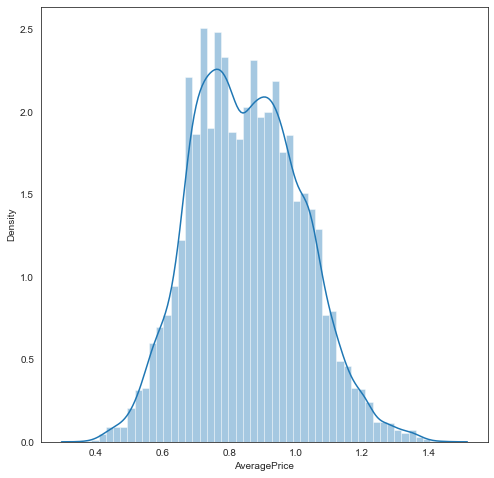

In [49]:
log_data = np.log(df.AveragePrice+1)
sns.set_style("white")
plt.figure(figsize=(8,8))
sns.distplot(log_data);

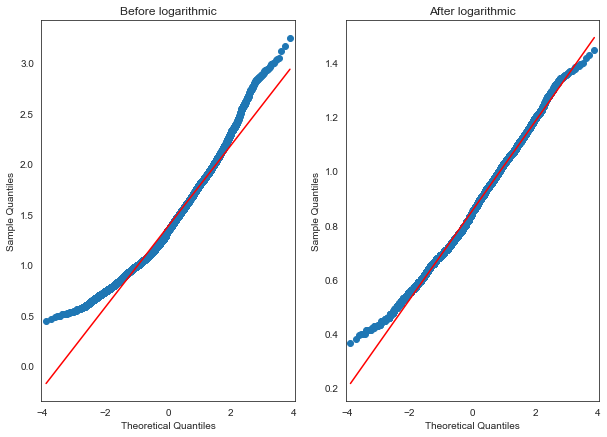

In [50]:
fig,ax = plt.subplots(1,2,figsize=(10,7))
sm.qqplot(df.AveragePrice,line="s",ax=ax[0])
ax[0].set_title("Before logarithmic")
sm.qqplot(log_data,line="s",ax=ax[1])
ax[1].set_title("After logarithmic");

In [51]:
# Region wise data analysis

In [52]:
len(df.region.unique())

54

In [53]:
df.groupby('region').size() 

region
Albany                 405
Atlanta                392
BaltimoreWashington    403
Boise                  403
Boston                 400
BuffaloRochester       389
California             414
Charlotte              369
Chicago                361
CincinnatiDayton       338
Columbus               385
DallasFtWorth          355
Denver                 362
Detroit                378
GrandRapids            361
GreatLakes             356
HarrisburgScranton     357
HartfordSpringfield    351
Houston                367
Indianapolis           354
Jacksonville           379
LasVegas               348
LosAngeles             341
Louisville             372
MiamiFtLauderdale      355
Midsouth               356
Nashville              363
NewOrleansMobile       338
NewYork                382
Northeast              350
NorthernNewEngland     367
Orlando                359
Philadelphia           351
PhoenixTucson          390
Pittsburgh             360
Plains                 350
Portland             

In [54]:
# The average prices by regions

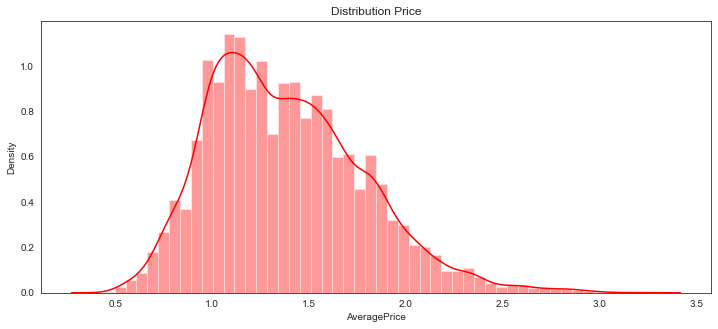

In [56]:
plt.figure(figsize=(12,5))
plt.title("Distribution Price")
ax = sns.distplot(df["AveragePrice"], color = 'r')

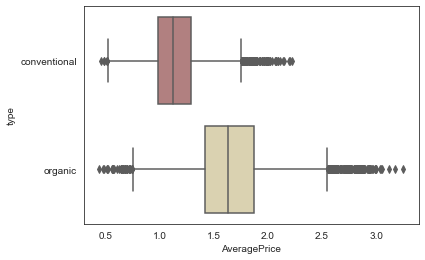

In [57]:
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'pink');

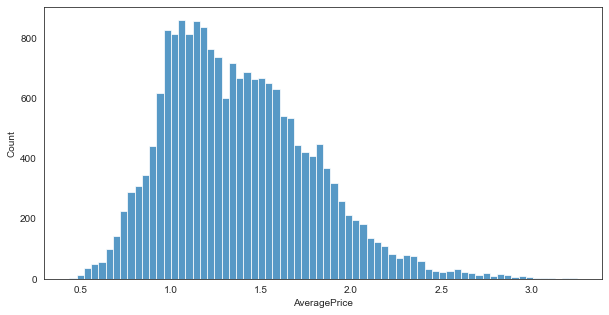

In [61]:
#Weight distribution of prices
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.histplot(df.dropna(subset = ['AveragePrice']).AveragePrice);

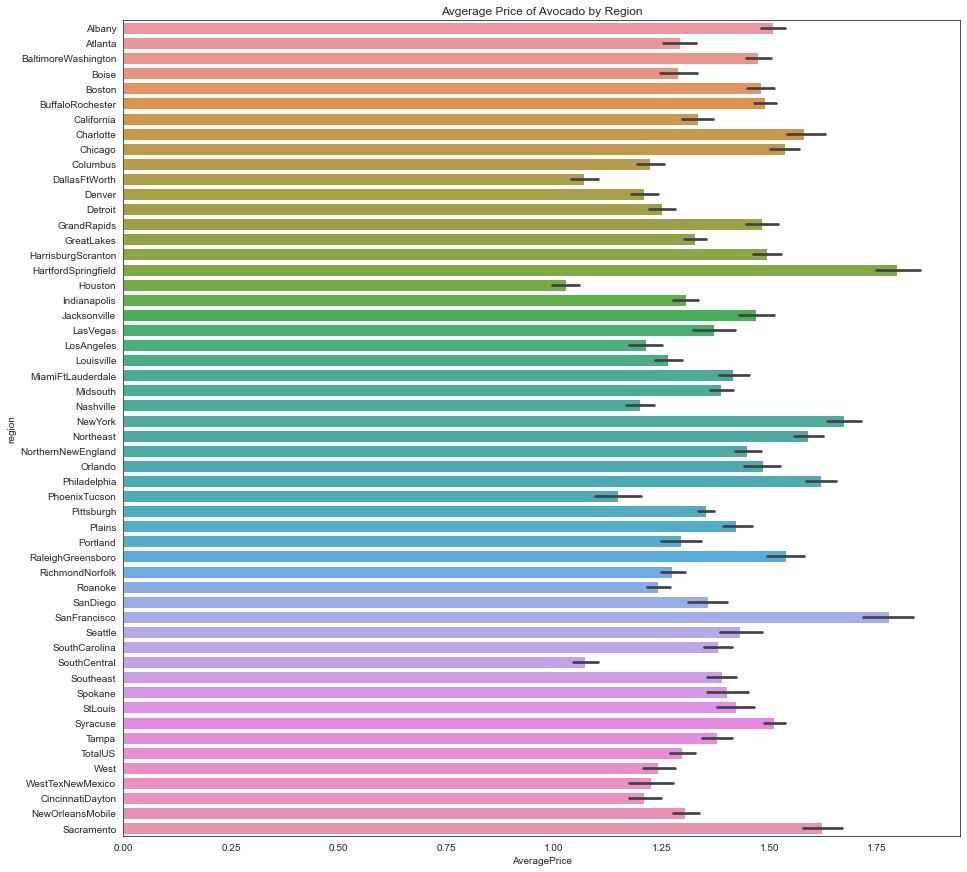

In [62]:
plt.figure(figsize=(15,15))

plt.title("Avgerage Price of Avocado by Region")

sns.barplot(x="AveragePrice",y="region",data=df)

plt.show()

In [64]:
# observations - the cities with highest selling with average price -sanfrancisco,seattle,hartfordspringfield etc

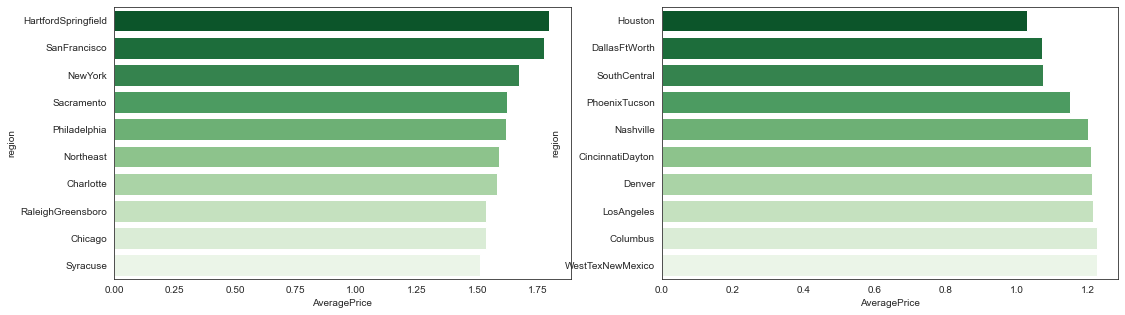

the most expensive datacados can be found in ['HartfordSpringfield', 'SanFrancisco', 'NewYork', 'Sacramento', 'Philadelphia'] 
the cheapest datacados can be found in ['Houston', 'DallasFtWorth', 'SouthCentral', 'PhoenixTucson', 'Nashville'] 


In [65]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))

regionP = df.groupby('region')['AveragePrice'].mean()

expensive = regionP.sort_values(ascending = False).iloc[:10]
cheap = regionP.sort_values().iloc[:10]

sns.barplot(x='AveragePrice', y='region', data = df, order=expensive.index, ci=None, palette='Greens_r', ax=ax[0])
sns.barplot(x='AveragePrice', y='region', data = df, order=cheap.index, ci=None, palette='Greens_r', ax=ax[1])

plt.show()

cheap = pd.DataFrame(cheap).reset_index()
expensive = pd.DataFrame(expensive).reset_index()

print('the most expensive datacados can be found in {} '.format(list(expensive.iloc[:5,0])))
print('the cheapest datacados can be found in {} '.format(list(cheap.iloc[:5,0])))

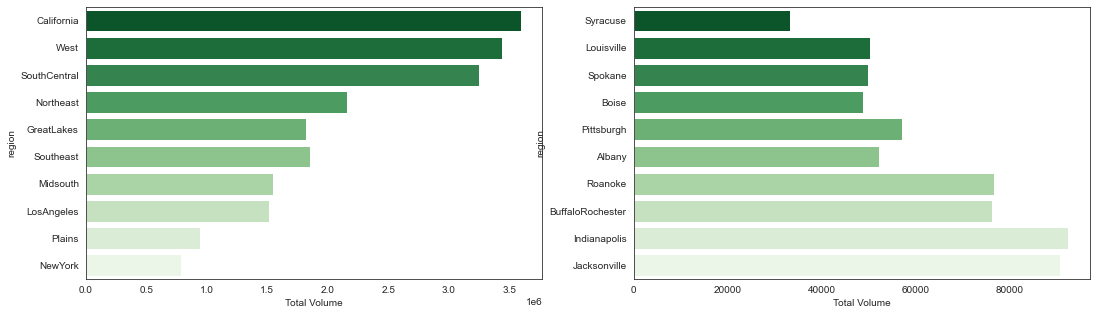

States with the the biggest demand are ['California', 'West', 'SouthCentral', 'Northeast', 'GreatLakes'] 
States with the least demand are ['Syracuse', 'Louisville', 'Spokane', 'Boise', 'Pittsburgh'] 


In [66]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))

dataStates = df[df['region'] !='TotalUS']

regionV = dataStates.groupby('region')['Total Volume'].sum()

most = regionV.sort_values(ascending = False).iloc[:10]
least = regionV.sort_values().iloc[:10]

sns.barplot(x='Total Volume', y='region', data = dataStates, order=most.index, ci=None, palette='Greens_r', ax=ax[0])
sns.barplot(x='Total Volume', y='region', data = dataStates, order=least.index, ci=None, palette='Greens_r', ax=ax[1])

plt.show()

most = pd.DataFrame(most).reset_index()
least = pd.DataFrame(least).reset_index()

print('States with the the biggest demand are {} '.format(list(most.iloc[:5,0])))
print('States with the least demand are {} '.format(list(least.iloc[:5,0])))

In [69]:
print(len(df.type.unique()))

df.groupby('type').size()


2


type
conventional    10643
organic          9123
dtype: int64

In [70]:
# The average prices of avocados by types

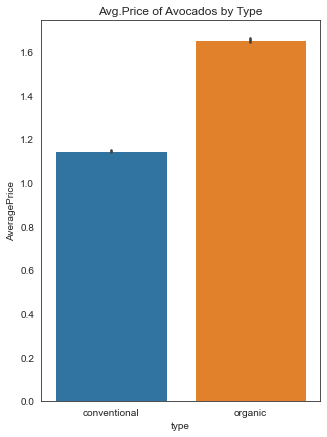

In [71]:
plt.figure(figsize=(5,7))

plt.title("Avg.Price of Avocados by Type")

sns.barplot(x="type",y="AveragePrice",data= df)

plt.show()

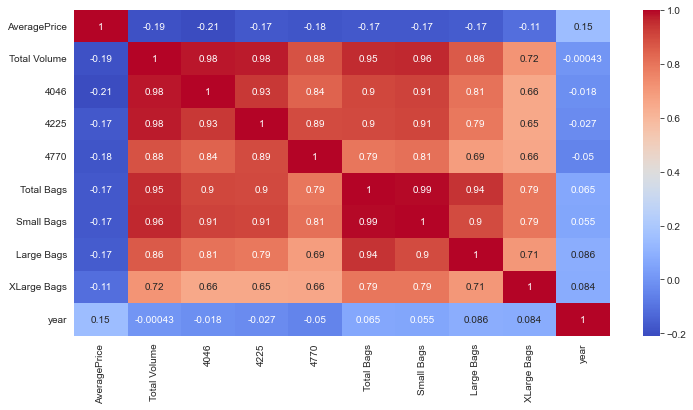

In [72]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True);

In [73]:
# observations- 1. There is a high correlation between pairs , 4046 & total volume (0.98) 4225 & total volume (0.97) 4770 & total volume (0.87) total bags & total volume (0.96) small bags & total bags (0.99) etc

In [76]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(df.type.drop_duplicates()) 
dicts['type'] = list(label.classes_)
df.type = label.transform(df.type) 

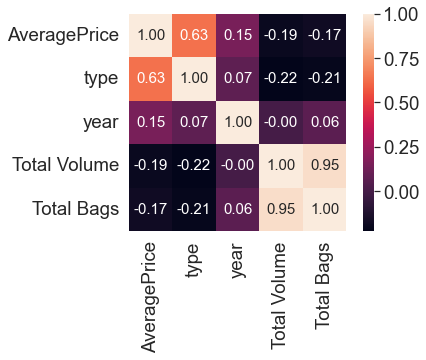

In [77]:
cols = ['AveragePrice','type','year','Total Volume','Total Bags']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

In [78]:
# observation - The price of avocado is influenced by the type

In [79]:
# Specifying dependent and independent variables

X = df[['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']]
Y = df['AveragePrice']
y=np.log1p(Y)

In [80]:
X.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015.0,Albany
1,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015.0,Albany
2,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015.0,Albany
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015.0,Albany
4,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015.0,Albany


In [81]:
Y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [82]:
# Labeling the categorical variables

In [83]:
# X_labelled = pd.get_dummies(X[["type","region"]], drop_first = True)
# X_labelled.head()

X = pd.get_dummies(X, prefix=["type","region"], columns=["type","region"], drop_first = True)
X.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,type_1,region_Atlanta,region_BaltimoreWashington,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,2015.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,674.28,44638.81,58.33,9408.07,97.49,0.0,2015.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,794.70,109149.67,130.50,8042.21,103.14,0.0,2015.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,2015.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,941.48,43838.39,75.78,5986.26,197.69,0.0,2015.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
print(X.columns)

Index(['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'year', 'type_1', 'region_Atlanta', 'region_BaltimoreWashington',
       'region_Boise', 'region_Boston', 'region_BuffaloRochester',
       'region_California', 'region_Charlotte', 'region_Chicago',
       'region_CincinnatiDayton', 'region_Columbus', 'region_DallasFtWorth',
       'region_Denver', 'region_Detroit', 'region_GrandRapids',
       'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh',
       'region_Plains', 'region_Portland', 'region_RaleighGreensboro',
       

In [85]:
# Train test 

In [86]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.3, random_state = 99)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((13836, 61), (5930, 61), (13836,), (5930,))

In [87]:
# Training the Model

In [88]:
# Multiple Linear Regression

In [89]:
lr = LinearRegression()
lr.fit(X_train,y_train)

print("R2 of Linear Regresson:", lr.score(X_train,y_train) )
print("----- Prediction Accuracy-----")
print('MAE: ',metrics.mean_absolute_error(y_valid, lr.predict(X_valid)))
print('MSE: ',metrics.mean_squared_error(y_valid, lr.predict(X_valid)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_valid, lr.predict(X_valid))))

R2 of Linear Regresson: 0.5750994108349925
----- Prediction Accuracy-----
MAE:  0.19236030533773682
MSE:  0.06689210608327972
RMSE: 0.2586350828547429


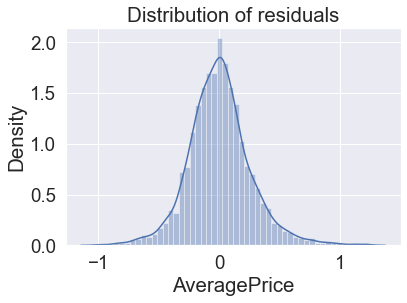

In [90]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_valid - lr.predict(X_valid))
plt.title('Distribution of residuals')
plt.show()

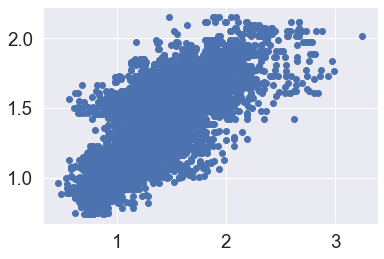

In [91]:
plt.scatter(y_valid,lr.predict(X_valid));

In [92]:
# Linear Regression RMSE : 
print('RMSE value of the Linear Regr : ',round(np.sqrt(metrics.mean_squared_error(y_valid, lr.predict(X_valid))),4))


RMSE value of the Linear Regr :  0.2586


In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [94]:
print('shape of X and y respectively(train) :',X_train.shape,y_train.shape)
print('shape of X and y respectively(test) :',X_test.shape,y_test.shape)

shape of X and y respectively(train) : (15812, 61) (15812,)
shape of X and y respectively(test) : (3954, 61) (3954,)


In [99]:
# Decision-Tree

In [101]:
df=df[["year","Small Bags","Large Bags", "AveragePrice"]]

df = df.sample(n=50,replace=True)
#df=df.head(50)
df.tail()

,year,Small Bags,Large Bags,AveragePrice
18997,2015.0,59620.93,0.00,1.25
34661,2018.0,1645.95,2229.58,1.30
19724,2016.0,108571.35,4797.75,1.04
31144,2016.0,24069.73,75141.70,1.39
31404,2017.0,340.94,2393.31,1.23


In [102]:
y=df.iloc[:,1].values
x=df.iloc[:,-1].values

In [103]:
x=x.reshape(len(x),1)
y=y.reshape(len(y),1)

In [104]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [105]:
## Predicting a new result: What is the price for the 
regressor.predict([[8042.21]])

array([1686.43])

In [106]:
regressor.predict([[8000]])

array([1686.43])

In [107]:
regressor.predict([[18000]])


array([1686.43])

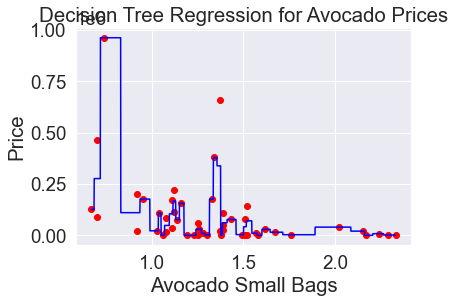

In [108]:
X_grid = np.arange(min(x), max(x), 0.001)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(x,y, color="red")
plt.plot(X_grid, regressor.predict(X_grid), color="blue")

plt.title("Decision Tree Regression for Avocado Prices")
plt.xlabel("Avocado Small Bags")
plt.ylabel("Price")
plt.show()

In [ ]:
# observations - 1. Conventional avocados sell way more than organic avocados and cost less. 
# 2. When there is an overproduction of avocados they will have a negative impact on the market price of avocados. 